In [13]:
import numpy as np 
import gvar as gv
import h5py as h5

from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import *
from lametlat.preprocess.read_raw import pt2_to_meff

In [14]:
data_path = "output/S16T16_cg_proton_PDF.h5"

# read data
f = h5.File(data_path, 'r')

# read 2pt data
pt2_real = f['2pt']['px0_py0_pz0_pt0']['real']
pt2_imag = f['2pt']['px0_py0_pz0_pt0']['imag']

pt2_real_jk = jackknife(pt2_real)
pt2_imag_jk = jackknife(pt2_imag)

pt2_real_jk_avg = jk_ls_avg(pt2_real_jk)
pt2_imag_jk_avg = jk_ls_avg(pt2_imag_jk)

# read 3pt data
pt3_real = f['3pt']['px0_py0_pz0_pt0']['tsep_8']['z_0']['down']['PpSzp']['gamma_T']['real']
pt3_imag = f['3pt']['px0_py0_pz0_pt0']['tsep_8']['z_0']['down']['PpSzp']['gamma_T']['imag']

pt3_real_jk = jackknife(pt3_real)
pt3_imag_jk = jackknife(pt3_imag)

pt3_real_jk_avg = jk_ls_avg(pt3_real_jk)
pt3_imag_jk_avg = jk_ls_avg(pt3_imag_jk)

print(np.shape(pt2_real_jk_avg))
print(np.shape(pt3_real_jk_avg))


(16,)
(16,)


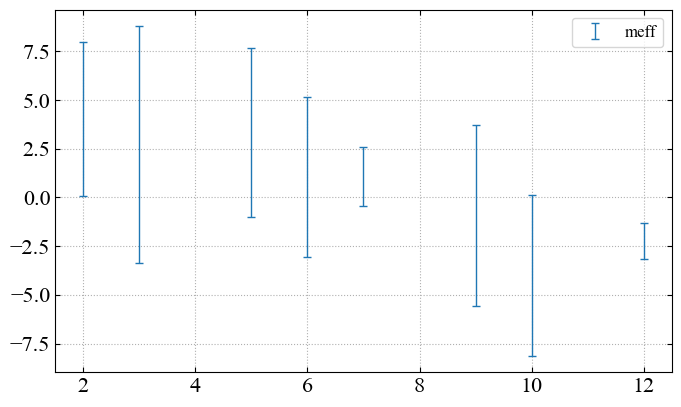

[1 ± 1.1e-16 -0.00013(14) 3.9(5.3)e-06 0.7(2.6)e-07 0.5(2.5)e-08
 -1.5(2.9)e-09 -0.6(2.1)e-10 -2.0(3.3)e-11 -6.8(7.8)e-12 2.1(3.8)e-11
 0.5(2.3)e-10 2.9(3.4)e-09 -3.4(3.7)e-08 -3.2(3.9)e-07 1.3(4.4)e-06
 -0.00010(11)]
[0.008(77) -0.8(5.8)e-05 1.8(4.6)e-06 -6.0(6.6)e-07 0.7(2.1)e-08
 -1.0(2.6)e-09 0.5(2.0)e-10 -3.5(3.5)e-11 -1.9(5.3)e-12 1.0(2.3)e-11
 -0.6(2.6)e-10 0.1(2.4)e-09 -2.3(3.0)e-08 1.4(2.9)e-07 -1.0(4.3)e-06
 -0.00007(11)]


In [15]:
meff = pt2_to_meff(pt2_real_jk_avg, boundary="none")

fig, ax = default_plot()
ax.errorbar(np.arange(len(meff)), gv.mean(meff), gv.sdev(meff), label='meff', **errorb)
ax.legend(loc="upper right", ncol=2, **fs_small_p)
plt.tight_layout()
plt.show()

print(pt2_real_jk_avg / pt2_real_jk_avg[0])
print(pt2_imag_jk_avg / pt2_real_jk_avg[0])

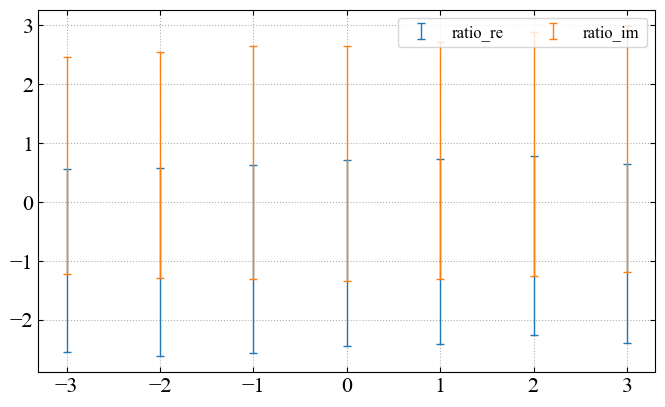

In [17]:
tsep = 8
tau_cut = 1

ratio_re = pt3_real_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]
ratio_im = pt3_imag_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]

tau_ls = np.arange(1, tsep+1-tau_cut) - tsep/2

fig, ax = default_plot()
ax.errorbar(tau_ls, gv.mean(ratio_re), gv.sdev(ratio_re), label='ratio_re', **errorb)
ax.errorbar(tau_ls, gv.mean(ratio_im), gv.sdev(ratio_im), label='ratio_im', **errorb)
ax.legend(loc="upper right", ncol=2, **fs_small_p)
plt.tight_layout()
plt.show()
